In [7]:
# Verinin incelenmesi için oluşturulan sınıf.
#Bu sınıf otomatik olarak veri hakkında ön bilgi verecek ve görselleştirilmesini sağlayacak

class DataInspect:
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import scipy.stats as stats
    
    
    def __init__(self,data):
        self.data = data
    
    
    #Veri için açıklayıcı özet çıkaracak fonksiyon
    def preInfo(self):
        #Verinin ilk 10 satırını gösterme
        print('\033[1m' + "First 10 row of the data\n" + '\033[0m')
        print(self.data.head(10))
        
        #Verinin veri tiplerini görüntüleme
        print('\033[1m' + "\n\nTypes of the columns\n" + '\033[0m')
        print(self.data.dtypes)
        
        #Verinin özet açıklaması ( mean , std. min , max vb.)
        print('\033[1m' + "\n\nDescription of the data\n" + '\033[0m')
        print (self.data.describe())
        
        #Verideki eksik değerlerin kolonlara göre sayısı
        print('\033[1m' + "\n\nNumber of null values\n" + '\033[0m')
        print(self.data.isnull().sum(axis = 0))
        
    # Verinin görselleştirilmesi için çağırılan fonksiyon    
    def preGraph(self):
        import warnings
        warnings.filterwarnings("ignore")
        
        print('\033[1m' + "\n\nData Visualiation\n" + '\033[0m')
      
        newplt=self.plt
        
        
        #Verideki veri tiplerine göre görselleştirme
        #Eğer kolon tipi sayısal değer ise kdeplot , object ise countplot çizdirilecek 
        for i in range(len(self.data.columns)):
               
            
            if (self.data.dtypes[i] != "object"):
                f,axes = newplt.subplots(1,1)
                sns.distplot(self.data.iloc[:,i],bins = 20)
                
            else:
                f,axes = newplt.subplots(1,1)
                sns.countplot(self.data.iloc[:,i],data=self.data)
        
        # Verinin boxplot gösterimi
        newplt.figure(figsize=(10,10))
        sns.boxplot(data=self.data)
        
        # Verinin Korelasyon Grafiği Gösterimi
        fig,ax = newplt.subplots(figsize=(5, 5))
        sns.heatmap(self.data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        newplt.show()
        
    # Kategorik olmkayan bağımsız değişkenlerin olasılık plotunun çıkarılması    
    def testStatsPlot(self):
        
        print('\033[1m' + "\n\nTest Statistics\n" + '\033[0m')
        
        newplt=self.plt
        
        print('\033[1m' + "\n\nProbability Plots of Data \n" + '\033[0m')
        nonObjColumns =[]
        for j in range (len(self.data.columns)):
            if (self.data.dtypes[j] != "object"):
                nonObjColumns.append(j)
                
        for i in range(0,len(nonObjColumns),2):
   
            figg=newplt.figure(figsize=(15,5))
            ax1=newplt.subplot(1,2,1)
            res=stats.probplot(self.data.iloc[:,nonObjColumns[i]].dropna(),dist = "norm", plot=plt)
            ax1.set_title("Probability Plot of '{0}' Column ".format(self.data.columns[nonObjColumns[i]]))
        
            if(i!=len(nonObjColumns)-1):
            
                ax2=newplt.subplot(1,2,2)
                res2=stats.probplot(self.data.iloc[:,nonObjColumns[i+1]].dropna(),dist = "norm", plot=plt)
                ax2.set_title("Probability Plot of '{0}' Column ".format(self.data.columns[nonObjColumns[i+1]]))
                plt.show()
     
    # Bağımsız değişkenlerin normal dağılıma sahip olup olmadığını girilen alpha değeri ile kontrol ediyor 
        
    def testStatsNormTest(self,alpha,response):
        data=self.data.copy()
        data=data.drop(columns=[response])
        
        np=self.np
        stats=self.stats
        pd=self.pd
        
        alphaValue=alpha
        comparisionWithAlfa=[]
        statValueArray=[]
        pValueArray=[]
        objCol,objName,nonObjCol,nonObjName=self.typeFinder(response)

        for i in range(0,len(nonObjCol)):
            stat , p = stats.shapiro(data.iloc[:,nonObjCol[i]].dropna())
            statValueArray.append(round(stat,4))
            pValueArray.append(round(p,9))
            if (p<alphaValue):
                comparisionWithAlfa.append('Yes')
            else:
                comparisionWithAlfa.append('No')
                
        statValueArray=np.array([statValueArray])
        pValueArray=np.array([pValueArray])
        comparisionWithAlfa=np.array([comparisionWithAlfa])
        
        pStatsDf=pd.DataFrame(np.concatenate((pValueArray,statValueArray,comparisionWithAlfa), axis=0))
        pStatsDf.columns =nonObjName
        pStatsDf.index=["P Value","Statistics","p<a ?"]
        return (pStatsDf)
 

    # Verilerin tipini bulup ayıran fonksiyon                                             
    def typeFinder(self,response):
        data=self.data.copy()
        data=data.drop(columns=[response])
        objColumns=[]
        objColumnNames=[]
        nonObjColumns=[]
        nonObjColumnNames=[]
        
        for j in range (len(data.columns)):
                    if (data.dtypes[j] == "object"):
                        objColumns.append(j)
                        objColumnNames.append(data.columns[j])
                        
                    else:
                        nonObjColumns.append(j)
                        nonObjColumnNames.append(data.columns[j])
                        
        return objColumns,objColumnNames,nonObjColumns,nonObjColumnNames
                                        
    
    def test(self):
        objCol,objName,nonObjcol,nonobjName=self.typeFinder()
        print(objCol)
        print(objName)
        print(nonObjcol)
        print(nonobjName)
        
class masterModel:
    
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn import tree
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    
    def __init__(self):
        pass
    
    def masterClassification(self,Xset,yset,Xtest,ytest):
        
        model_array=[]
        sonuc = []
        sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])
        
        knn_model = self.KNeighborsClassifier().fit(Xset, yset)
        model_array.append(knn_model)
        
        logistic_model=self.LogisticRegression().fit(Xset, yset)
        model_array.append(logistic_model)
        
        svc_model=self.SVC().fit(Xset, yset)
        model_array.append(svc_model)
        
        nb_model=self.GaussianNB().fit(Xset, yset)
        model_array.append(nb_model)
        
        decisiontree_model=self.tree.DecisionTreeClassifier().fit(Xset, yset)
        model_array.append(decisiontree_model)
        
        randomforest_model=self.RandomForestClassifier().fit(Xset, yset)
        model_array.append(randomforest_model)
        
        gbm_model=self.GradientBoostingClassifier().fit(Xset, yset)
        model_array.append(gbm_model)
        
        for model in model_array:
            isimler = model.__class__.__name__
            y_pred = model.predict(Xtest)
            dogruluk = accuracy_score(ytest, y_pred)    
            sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
            sonuclar = sonuclar.append(sonuc)
                    
        return (sonuclar)    
            
    

# FOREX VERİSİ : SVR-NAIVE BAYES - BOOSTING

In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
forexDataOrj=pd.read_excel("HW_Data_Set.xlsx")

In [4]:
forexDf=forexDataOrj.copy()

In [5]:
forexDf=forexDf.drop(["90_target","50_target"],axis = 1)

In [6]:
forexDf.head(1)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.8,17.62,11.73,...,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802


In [8]:
classData = DataInspect(forexDf)
objColumns,objColumnNames,nonObjColumns,nonObjColumnNames = classData.typeFinder("20_target")

In [9]:
print("Object tipindeki kolon numaraları : {}".format(objColumns))
print("Object tipindeki kolon isimleri : {}".format(objColumnNames))

Object tipindeki kolon numaraları : [60, 128, 129]
Object tipindeki kolon isimleri : ['ind_109', 'ind_420', 'ind_422']


In [10]:
# object olan kolonlar atıldı
forexDf=forexDf.drop(objColumnNames,axis = 1)

In [11]:
# verinin X ve y olarak ayrımı
X= forexDf.iloc[:,:-1]
y = forexDf.iloc[:,-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=False)

## SVR Model kurulumu

In [23]:
from sklearn.svm import SVR

In [13]:
#svr_model = SVR("linear").fit(X_train, y_train)

In [27]:
svr_model

SVR(kernel='linear')

In [16]:
svr_model.coef_

array([[-2.10449959e-01,  7.40699557e-02, -2.79646807e-02,
        -3.12669101e-02,  3.30226601e-03, -2.13308199e+00,
        -5.04527593e-02,  1.26552607e-01, -1.71975208e-01,
        -3.60038516e-01,  9.40683849e-01,  4.49855526e-01,
         1.42271660e-01,  6.42193162e-01,  1.03789596e+00,
         4.41299314e-01,  3.07046246e-01, -2.95202463e-02,
         1.64322026e-02, -6.54520230e-03, -9.68900118e-03,
        -6.76370113e-03, -5.37885053e-02,  3.80911885e-02,
        -5.87819642e-03, -5.65388201e-03,  5.26048356e-02,
        -4.66218432e-02,  5.61977963e-03,  3.23914166e-02,
         1.85091441e-02,  5.65659053e-01,  1.69758033e-02,
         4.48500112e-02,  1.84447799e-01, -6.67317945e-01,
         2.54486395e-01,  2.18502944e-01,  1.26375603e-01,
         1.67144634e-01,  8.73751276e-02,  2.80962735e-01,
        -1.59100304e-01, -1.85368969e-01, -9.73541102e-03,
         7.57629632e-04, -5.16728493e-01,  1.03167437e+00,
        -7.28655608e-02,  3.22692715e-01, -2.51674552e+0

In [18]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)

In [19]:
lm_pred  = lm_model.predict(X_test)
y_pred = svr_model.predict(X_test)

In [20]:
linearRMSE=np.sqrt(mean_squared_error(y_test, lm_pred))
svrRMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [22]:
# SVR default değerlerinde çalıştırıldığında Linear Regression modelinden daha hatalı çıkıyor.
print ("Linear Regression RMSE :{}\nSVR Model RMSE : {} " .format(linearRMSE,svrRMSE))

Linear Regression RMSE :15.567974614575373
SVR Model RMSE : 18.571355144531616 


### Model Tuning

In [12]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
# multicollinearity kontrolü , burada feature sayısını azaltacağım
xVifValues = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [14]:
columnNames = X.columns

In [15]:
newdata2Df=pd.DataFrame(xVifValues,columnNames)
newdata2Df.columns = ["Vif Degeri"]
newdata2Df.head()

,Vif Degeri
ind_5,1898.750913
ind_6,1240.114372
ind_8,inf
ind_9,inf
ind_10,inf


In [16]:
# Burada vif değeri 20 altında olanları alıyorum.
xAfterVif=forexDataOrj.loc[:,newdata2Df.iloc[:][newdata2Df["Vif Degeri"] < 20].index]

In [17]:
# 20 altında olan vif değerlerini aldığımmızda kolon sayısı 130 dan 44 e düşmekte. 
print ("Vif yapılmadan önce kolon sayısı : {}".format(X.shape[1]))
print ("Vif yapıldıktan sonra kolon sayısı : {}".format(xAfterVif.shape[1]))

Vif yapılmadan önce kolon sayısı : 130
Vif yapıldıktan sonra kolon sayısı : 44


In [21]:
X_train, X_test, y_train, y_test = train_test_split(xAfterVif, y, 
                                                    test_size=0.25, 
                                                    shuffle=False)

In [35]:
# Vif değerleri azaltılmış ile tekrar SVR kurulumu

In [24]:
svr_model = SVR("linear").fit(X_train, y_train)

In [25]:
svr_model

SVR(kernel='linear')

In [26]:
# Sadece VIF feature reduction yaparak bile rmse de azalma oldu.
y_pred = svr_model.predict(X_test)
print ("SVR Model RMSE with VIF : {} " .format(np.sqrt(mean_squared_error(y_test, y_pred))))

SVR Model RMSE with VIF : 16.992418524831024 


In [45]:
# Tuning ile parametre değiştirme

In [46]:
SVR?

In [27]:
svr_params = {"C": [0.1,0.5],
             "kernel" : ["linear","rbf"]}
#svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [29]:
svr_cv_model.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [30]:
svr_tuned = SVR("rbf", 
                C = 0.1).fit(X_train, y_train)

In [31]:
y_pred = svr_tuned.predict(X_test)

In [33]:
# Tuning ile birlikte RMSE değerimiz 16.99 dan 14.63 e düşmüş durumda
np.sqrt(mean_squared_error(y_test, y_pred))

14.636796630847405

In [24]:
svrScore = 14.636796630847405

# Forex Naive Bayes

In [37]:
forexDF2=forexDataOrj.copy()

In [38]:
forexDF2=forexDF2.drop(["90_target","50_target"],axis = 1)

In [39]:
forexDF2.head(1)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.8,17.62,11.73,...,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802


In [40]:
classData = DataInspect(forexDf)
objColumns,objColumnNames,nonObjColumns,nonObjColumnNames = classData.typeFinder("20_target")

In [42]:
# object olan kolonlar atıldı
forexDF2=forexDF2.drop(objColumnNames,axis = 1)

In [43]:
forexDF2.head(1)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.8,17.62,11.73,...,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802


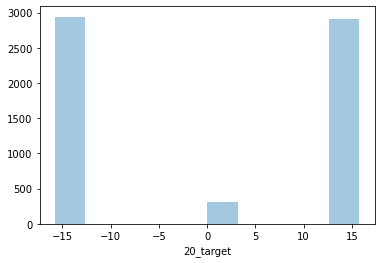

In [44]:
sns.distplot(forexDF2["20_target"],kde = False)

In [50]:
# Verilerin ayrılması
for i in range (len(forexDF2)):
    if ((forexDF2["20_target"][i] > -30) & (forexDF2["20_target"][i] < -10)):
        forexDF2["20_target"][i] = "negative"
    elif ((forexDF2["20_target"][i] > -5 )& (forexDF2["20_target"][i] < 5)):
        forexDF2["20_target"][i] = "zero"
    elif ((forexDF2["20_target"][i] > 10) & (forexDF2["20_target"][i] < 30)):
        forexDF2["20_target"][i] = "positive"
    

In [59]:
forexDF2["20_target"].unique()

array(['positive', 'negative', 'zero'], dtype=object)

In [82]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
encoded=le.fit_transform(forexDF2["20_target"])
# 1 değeri pozitif , 0 değeri  negatif , 2 değeri ise zero

In [83]:
forexDF2["20_target"]=encoded

In [86]:
forexDF2.head(1)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.8,17.62,11.73,...,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,1


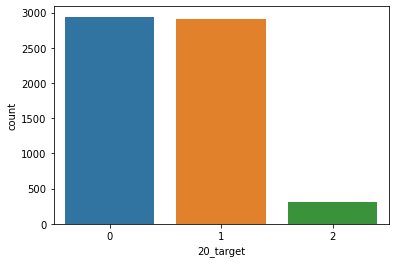

In [89]:
# 1 değeri pozitif , 0 değeri  negatif , 2 değeri ise zero
sns.countplot(x="20_target", data=forexDF2)

In [95]:
classData = DataInspect(forexDF2)
objColumns,objColumnNames,nonObjColumns,nonObjColumnNames = classData.typeFinder("20_target")

In [96]:
# object olan kolonlar atıldı
forexDF2=forexDF2.drop(objColumnNames,axis = 1)

In [97]:
# verinin X ve y olarak ayrımı
X= forexDF2.iloc[:,:-1]
y = forexDF2.iloc[:,-1]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=False)

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [136]:
y_pred = nb_model.predict(X_test)

In [137]:
# verilerimizi negatif , pozitif ve sıfırlar olarak ayırdğımıza modelimizin doğruluk skoru 0.285 çıkıyor.
accuracy_score(y_test, y_pred)

0.2853437094682231

In [138]:
cross_val_score(nb_model, X_test, y_test, cv = 5).mean()

0.2867503047114698

In [139]:
# Modelimiz "zero" yani nötr etiketli verileri  tahmin etmekte güçlük yaşıyor.
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.35      0.41       764
           1       0.45      0.20      0.28       725
           2       0.04      0.57      0.08        53

    accuracy                           0.29      1542
   macro avg       0.34      0.37      0.26      1542
weighted avg       0.47      0.29      0.34      1542



# Forex Boosting

## Forex CatBoost

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=False)

In [14]:
#!pip install catboost

In [15]:
from catboost import CatBoostRegressor

In [16]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.051261
0:	learn: 14.9131959	total: 71.6ms	remaining: 1m 11s
1:	learn: 14.8444168	total: 80ms	remaining: 39.9s
2:	learn: 14.7897288	total: 88.1ms	remaining: 29.3s
3:	learn: 14.7323607	total: 96.4ms	remaining: 24s
4:	learn: 14.7011370	total: 105ms	remaining: 20.8s
5:	learn: 14.6620799	total: 113ms	remaining: 18.7s
6:	learn: 14.6198745	total: 121ms	remaining: 17.2s
7:	learn: 14.5858862	total: 129ms	remaining: 16s
8:	learn: 14.5576278	total: 138ms	remaining: 15.2s
9:	learn: 14.5188446	total: 146ms	remaining: 14.4s
10:	learn: 14.4873018	total: 154ms	remaining: 13.8s
11:	learn: 14.4632873	total: 162ms	remaining: 13.3s
12:	learn: 14.4205094	total: 171ms	remaining: 13s
13:	learn: 14.3951822	total: 180ms	remaining: 12.7s
14:	learn: 14.3713032	total: 190ms	remaining: 12.5s
15:	learn: 14.3359541	total: 199ms	remaining: 12.2s
16:	learn: 14.2890349	total: 208ms	remaining: 12s
17:	learn: 14.2349402	total: 217ms	remaining: 11.8s
18:	learn: 14.2135373	total: 226ms	remaining: 11.

177:	learn: 11.3328878	total: 1.59s	remaining: 7.35s
178:	learn: 11.3215024	total: 1.6s	remaining: 7.34s
179:	learn: 11.3078153	total: 1.61s	remaining: 7.33s
180:	learn: 11.2910293	total: 1.62s	remaining: 7.32s
181:	learn: 11.2821860	total: 1.63s	remaining: 7.3s
182:	learn: 11.2722504	total: 1.63s	remaining: 7.29s
183:	learn: 11.2514823	total: 1.64s	remaining: 7.28s
184:	learn: 11.2321687	total: 1.65s	remaining: 7.27s
185:	learn: 11.2152781	total: 1.66s	remaining: 7.26s
186:	learn: 11.1970948	total: 1.67s	remaining: 7.25s
187:	learn: 11.1841077	total: 1.67s	remaining: 7.23s
188:	learn: 11.1679472	total: 1.68s	remaining: 7.22s
189:	learn: 11.1489672	total: 1.69s	remaining: 7.21s
190:	learn: 11.1356742	total: 1.7s	remaining: 7.2s
191:	learn: 11.1184585	total: 1.71s	remaining: 7.18s
192:	learn: 11.0994538	total: 1.72s	remaining: 7.17s
193:	learn: 11.0782602	total: 1.72s	remaining: 7.16s
194:	learn: 11.0582905	total: 1.73s	remaining: 7.15s
195:	learn: 11.0474412	total: 1.74s	remaining: 7.1

342:	learn: 9.0807171	total: 3.01s	remaining: 5.77s
343:	learn: 9.0671425	total: 3.02s	remaining: 5.76s
344:	learn: 9.0567724	total: 3.03s	remaining: 5.75s
345:	learn: 9.0486693	total: 3.04s	remaining: 5.74s
346:	learn: 9.0430169	total: 3.05s	remaining: 5.74s
347:	learn: 9.0296761	total: 3.06s	remaining: 5.73s
348:	learn: 9.0194919	total: 3.06s	remaining: 5.72s
349:	learn: 9.0135239	total: 3.07s	remaining: 5.71s
350:	learn: 9.0013405	total: 3.08s	remaining: 5.7s
351:	learn: 8.9890225	total: 3.09s	remaining: 5.69s
352:	learn: 8.9781472	total: 3.1s	remaining: 5.68s
353:	learn: 8.9725333	total: 3.11s	remaining: 5.67s
354:	learn: 8.9593998	total: 3.12s	remaining: 5.66s
355:	learn: 8.9455749	total: 3.13s	remaining: 5.65s
356:	learn: 8.9367828	total: 3.13s	remaining: 5.64s
357:	learn: 8.9276659	total: 3.14s	remaining: 5.63s
358:	learn: 8.9174776	total: 3.15s	remaining: 5.62s
359:	learn: 8.9038635	total: 3.16s	remaining: 5.62s
360:	learn: 8.8982236	total: 3.17s	remaining: 5.6s
361:	learn: 8.8

504:	learn: 7.6393089	total: 4.43s	remaining: 4.34s
505:	learn: 7.6363571	total: 4.44s	remaining: 4.33s
506:	learn: 7.6306250	total: 4.45s	remaining: 4.32s
507:	learn: 7.6257610	total: 4.46s	remaining: 4.32s
508:	learn: 7.6167538	total: 4.47s	remaining: 4.31s
509:	learn: 7.6086999	total: 4.47s	remaining: 4.3s
510:	learn: 7.6020265	total: 4.48s	remaining: 4.29s
511:	learn: 7.5943705	total: 4.49s	remaining: 4.28s
512:	learn: 7.5877150	total: 4.5s	remaining: 4.27s
513:	learn: 7.5830984	total: 4.51s	remaining: 4.26s
514:	learn: 7.5733834	total: 4.52s	remaining: 4.25s
515:	learn: 7.5654049	total: 4.53s	remaining: 4.25s
516:	learn: 7.5554392	total: 4.53s	remaining: 4.24s
517:	learn: 7.5458777	total: 4.54s	remaining: 4.23s
518:	learn: 7.5376322	total: 4.55s	remaining: 4.22s
519:	learn: 7.5296022	total: 4.56s	remaining: 4.21s
520:	learn: 7.5241727	total: 4.57s	remaining: 4.2s
521:	learn: 7.5204334	total: 4.58s	remaining: 4.19s
522:	learn: 7.5128172	total: 4.58s	remaining: 4.18s
523:	learn: 7.5

665:	learn: 6.5423775	total: 5.86s	remaining: 2.94s
666:	learn: 6.5365506	total: 5.87s	remaining: 2.93s
667:	learn: 6.5311619	total: 5.88s	remaining: 2.92s
668:	learn: 6.5239605	total: 5.89s	remaining: 2.91s
669:	learn: 6.5181257	total: 5.9s	remaining: 2.9s
670:	learn: 6.5117898	total: 5.9s	remaining: 2.9s
671:	learn: 6.5102361	total: 5.91s	remaining: 2.89s
672:	learn: 6.5029989	total: 5.92s	remaining: 2.88s
673:	learn: 6.4991372	total: 5.93s	remaining: 2.87s
674:	learn: 6.4926937	total: 5.94s	remaining: 2.86s
675:	learn: 6.4887775	total: 5.95s	remaining: 2.85s
676:	learn: 6.4808852	total: 5.96s	remaining: 2.84s
677:	learn: 6.4750302	total: 5.97s	remaining: 2.83s
678:	learn: 6.4692673	total: 5.98s	remaining: 2.83s
679:	learn: 6.4633634	total: 5.99s	remaining: 2.82s
680:	learn: 6.4563440	total: 5.99s	remaining: 2.81s
681:	learn: 6.4511951	total: 6s	remaining: 2.8s
682:	learn: 6.4436676	total: 6.01s	remaining: 2.79s
683:	learn: 6.4400901	total: 6.02s	remaining: 2.78s
684:	learn: 6.437578

827:	learn: 5.6610412	total: 7.27s	remaining: 1.51s
828:	learn: 5.6567313	total: 7.28s	remaining: 1.5s
829:	learn: 5.6527247	total: 7.29s	remaining: 1.49s
830:	learn: 5.6491711	total: 7.3s	remaining: 1.48s
831:	learn: 5.6416388	total: 7.31s	remaining: 1.48s
832:	learn: 5.6376405	total: 7.32s	remaining: 1.47s
833:	learn: 5.6298690	total: 7.33s	remaining: 1.46s
834:	learn: 5.6241876	total: 7.33s	remaining: 1.45s
835:	learn: 5.6187585	total: 7.34s	remaining: 1.44s
836:	learn: 5.6141103	total: 7.35s	remaining: 1.43s
837:	learn: 5.6078773	total: 7.36s	remaining: 1.42s
838:	learn: 5.6024526	total: 7.37s	remaining: 1.41s
839:	learn: 5.5981119	total: 7.38s	remaining: 1.41s
840:	learn: 5.5939982	total: 7.39s	remaining: 1.4s
841:	learn: 5.5895104	total: 7.39s	remaining: 1.39s
842:	learn: 5.5840665	total: 7.4s	remaining: 1.38s
843:	learn: 5.5802067	total: 7.41s	remaining: 1.37s
844:	learn: 5.5738414	total: 7.42s	remaining: 1.36s
845:	learn: 5.5695270	total: 7.43s	remaining: 1.35s
846:	learn: 5.56

993:	learn: 4.9718462	total: 8.69s	remaining: 52.5ms
994:	learn: 4.9661277	total: 8.7s	remaining: 43.7ms
995:	learn: 4.9622286	total: 8.71s	remaining: 35ms
996:	learn: 4.9587094	total: 8.72s	remaining: 26.2ms
997:	learn: 4.9535330	total: 8.73s	remaining: 17.5ms
998:	learn: 4.9480754	total: 8.73s	remaining: 8.74ms
999:	learn: 4.9424521	total: 8.74s	remaining: 0us


In [17]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

16.20269422418258

## Catboost Tuning

In [18]:
catb_grid = {
    'iterations': [200,500,1000],
    'learning_rate': [0.01, 0.03, 0.05],
    'depth': [3,4,5,6] }

In [19]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [20]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  9.1min finished


0:	learn: 14.9569875	total: 3.23ms	remaining: 642ms
1:	learn: 14.9513823	total: 5.86ms	remaining: 580ms
2:	learn: 14.9480408	total: 8.52ms	remaining: 560ms
3:	learn: 14.9423851	total: 11.2ms	remaining: 548ms
4:	learn: 14.9380784	total: 13.8ms	remaining: 539ms
5:	learn: 14.9312950	total: 16.5ms	remaining: 534ms
6:	learn: 14.9274007	total: 19.2ms	remaining: 530ms
7:	learn: 14.9231052	total: 21.9ms	remaining: 526ms
8:	learn: 14.9199247	total: 24.7ms	remaining: 524ms
9:	learn: 14.9148635	total: 27.5ms	remaining: 523ms
10:	learn: 14.9109607	total: 30.3ms	remaining: 521ms
11:	learn: 14.9073347	total: 33ms	remaining: 518ms
12:	learn: 14.9038621	total: 35.8ms	remaining: 515ms
13:	learn: 14.9005328	total: 38.6ms	remaining: 513ms
14:	learn: 14.8967427	total: 41.5ms	remaining: 511ms
15:	learn: 14.8918399	total: 44.1ms	remaining: 508ms
16:	learn: 14.8883397	total: 46.8ms	remaining: 504ms
17:	learn: 14.8843453	total: 49.5ms	remaining: 501ms
18:	learn: 14.8814051	total: 52.2ms	remaining: 498ms
19:	l

177:	learn: 14.4562181	total: 519ms	remaining: 64.2ms
178:	learn: 14.4547265	total: 522ms	remaining: 61.3ms
179:	learn: 14.4513976	total: 525ms	remaining: 58.4ms
180:	learn: 14.4490136	total: 529ms	remaining: 55.5ms
181:	learn: 14.4456973	total: 532ms	remaining: 52.6ms
182:	learn: 14.4448420	total: 535ms	remaining: 49.7ms
183:	learn: 14.4425708	total: 538ms	remaining: 46.8ms
184:	learn: 14.4401356	total: 541ms	remaining: 43.8ms
185:	learn: 14.4377997	total: 544ms	remaining: 40.9ms
186:	learn: 14.4353114	total: 547ms	remaining: 38ms
187:	learn: 14.4337250	total: 550ms	remaining: 35.1ms
188:	learn: 14.4306384	total: 553ms	remaining: 32.2ms
189:	learn: 14.4286570	total: 556ms	remaining: 29.2ms
190:	learn: 14.4276762	total: 559ms	remaining: 26.3ms
191:	learn: 14.4242037	total: 562ms	remaining: 23.4ms
192:	learn: 14.4227776	total: 565ms	remaining: 20.5ms
193:	learn: 14.4205428	total: 568ms	remaining: 17.6ms
194:	learn: 14.4190977	total: 571ms	remaining: 14.6ms
195:	learn: 14.4174972	total: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000025A7E04FE08>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6], 'iterations': [200, 500, 1000],
                         'learning_rate': [0.01, 0.03, 0.05]},
             verbose=2)

In [21]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.01}

In [22]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 3)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 14.9569875	total: 4.62ms	remaining: 919ms
1:	learn: 14.9513823	total: 7.51ms	remaining: 744ms
2:	learn: 14.9480408	total: 10.3ms	remaining: 674ms
3:	learn: 14.9423851	total: 13ms	remaining: 636ms
4:	learn: 14.9380784	total: 15.9ms	remaining: 618ms
5:	learn: 14.9312950	total: 18.7ms	remaining: 606ms
6:	learn: 14.9274007	total: 21.6ms	remaining: 596ms
7:	learn: 14.9231052	total: 24.5ms	remaining: 588ms
8:	learn: 14.9199247	total: 27.5ms	remaining: 585ms
9:	learn: 14.9148635	total: 30.4ms	remaining: 578ms
10:	learn: 14.9109607	total: 33.4ms	remaining: 574ms
11:	learn: 14.9073347	total: 36.2ms	remaining: 568ms
12:	learn: 14.9038621	total: 39.2ms	remaining: 564ms
13:	learn: 14.9005328	total: 42ms	remaining: 558ms
14:	learn: 14.8967427	total: 44.8ms	remaining: 553ms
15:	learn: 14.8918399	total: 47.7ms	remaining: 548ms
16:	learn: 14.8883397	total: 50.5ms	remaining: 544ms
17:	learn: 14.8843453	total: 53.4ms	remaining: 540ms
18:	learn: 14.8814051	total: 56.3ms	remaining: 536ms
19:	lea

177:	learn: 14.4562181	total: 516ms	remaining: 63.7ms
178:	learn: 14.4547265	total: 519ms	remaining: 60.9ms
179:	learn: 14.4513976	total: 522ms	remaining: 58ms
180:	learn: 14.4490136	total: 525ms	remaining: 55.1ms
181:	learn: 14.4456973	total: 528ms	remaining: 52.2ms
182:	learn: 14.4448420	total: 531ms	remaining: 49.3ms
183:	learn: 14.4425708	total: 534ms	remaining: 46.5ms
184:	learn: 14.4401356	total: 537ms	remaining: 43.6ms
185:	learn: 14.4377997	total: 541ms	remaining: 40.7ms
186:	learn: 14.4353114	total: 544ms	remaining: 37.8ms
187:	learn: 14.4337250	total: 546ms	remaining: 34.9ms
188:	learn: 14.4306384	total: 549ms	remaining: 32ms
189:	learn: 14.4286570	total: 552ms	remaining: 29.1ms
190:	learn: 14.4276762	total: 555ms	remaining: 26.1ms
191:	learn: 14.4242037	total: 558ms	remaining: 23.2ms
192:	learn: 14.4227776	total: 561ms	remaining: 20.3ms
193:	learn: 14.4205428	total: 564ms	remaining: 17.4ms
194:	learn: 14.4190977	total: 566ms	remaining: 14.5ms
195:	learn: 14.4174972	total: 56

In [26]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
catboostScore=np.sqrt(mean_squared_error(y_test, y_pred))
catboostScore

14.457867541439894

In [29]:
#En iyi çalışan modelimiz 14.45 RMSE ile catboost
print("SVR Skoru :{}\nCatboost Skoru: {}\n".format(svrScore,catboostScore))

SVR Skoru :14.636796630847405
Catboost Skoru: 14.457867541439894



# BANKA VERİSİ SVM- NAIVE BAYES VE BOOSTING

In [57]:
bankaDataOrj = pd.read_csv("hmelq.csv")

In [58]:
bankadf = bankaDataOrj.copy()

In [59]:
bankadf.head(1)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042


In [60]:
bankadf.job.isnull().sum()

167

In [61]:
# nulları atınca satır sayısı 3576 dan 2018 e düştü
bankadf=bankadf.dropna()
bankadf.head(5)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [62]:
# oluşturduğum sınıf ile kategorik değişkenlerin belirlenmesi
classData = DataInspect(bankadf)
objColumns,objColumnNames,nonObjColumns,nonObjColumnNames = classData.typeFinder("bad")

In [63]:
print("Object tipindeki kolon numaraları : {}".format(objColumns))
print("Object tipindeki kolon isimleri : {}".format(objColumnNames))

Object tipindeki kolon numaraları : [3, 4]
Object tipindeki kolon isimleri : ['reason', 'job']


In [64]:
# verinin X ve y olarak ayrımı
X= bankadf.drop("bad",axis = 1 )
y = bankadf["bad"]

In [66]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

In [67]:
# dummy ayrımı
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        objColumnNames)], 
                                      remainder='passthrough') 
  
X = np.array(columnTransformer.fit_transform(X), dtype = np.str) 

In [68]:
X = pd.DataFrame(X)
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.458999999999996
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.2
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


## BANKA VERİSİ SVM

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [70]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [72]:
y_pred = svm_model.predict(X_test)

In [73]:
# Modelin tune edilmemiş hali skoru 0.9267
accuracy_score(y_test, y_pred)

0.9267326732673268

### Tuning

In [ ]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

In [ ]:
svc_model_cv.best_params_

In [74]:
svc_tuned = SVC(kernel = "linear", C = 8).fit(X_train, y_train)

In [77]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)
svcScore = accuracy_score(y_test, y_pred)
svcScore

0.9267326732673268

## BANKA VERİSİ NAIVE BAYES


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [83]:
y_pred = nb_model.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)


0.904950495049505

In [94]:
naiveScore = 0.904950495049505

In [85]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.9306666666666669

In [87]:
# Modelimiz "bad" olanları tahmin etmekte daha başarılı
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       466
           1       0.32      0.21      0.25        39

    accuracy                           0.90       505
   macro avg       0.63      0.58      0.60       505
weighted avg       0.89      0.90      0.90       505



## BANKA VERİSİ CATBOOSTING

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [90]:
from catboost import CatBoostClassifier

In [92]:
cat_model = CatBoostClassifier().fit(X_train, y_train,verbose=1)

Learning rate set to 0.012295
0:	learn: 0.6790730	total: 2.79ms	remaining: 2.79s
1:	learn: 0.6653024	total: 5.48ms	remaining: 2.74s
2:	learn: 0.6520232	total: 7.92ms	remaining: 2.63s
3:	learn: 0.6387608	total: 10.3ms	remaining: 2.57s
4:	learn: 0.6260466	total: 12.7ms	remaining: 2.54s
5:	learn: 0.6139957	total: 15.1ms	remaining: 2.5s
6:	learn: 0.6012506	total: 17.5ms	remaining: 2.48s
7:	learn: 0.5894019	total: 19.9ms	remaining: 2.47s
8:	learn: 0.5785514	total: 22.4ms	remaining: 2.46s
9:	learn: 0.5681672	total: 24.4ms	remaining: 2.41s
10:	learn: 0.5577601	total: 26.3ms	remaining: 2.36s
11:	learn: 0.5470630	total: 28.7ms	remaining: 2.36s
12:	learn: 0.5374239	total: 31ms	remaining: 2.36s
13:	learn: 0.5257013	total: 34ms	remaining: 2.4s
14:	learn: 0.5163719	total: 36.5ms	remaining: 2.4s
15:	learn: 0.5085850	total: 39.2ms	remaining: 2.41s
16:	learn: 0.4992611	total: 41.6ms	remaining: 2.4s
17:	learn: 0.4918311	total: 44.1ms	remaining: 2.41s
18:	learn: 0.4826634	total: 46.5ms	remaining: 2.4s
1

214:	learn: 0.1676897	total: 498ms	remaining: 1.82s
215:	learn: 0.1671899	total: 501ms	remaining: 1.82s
216:	learn: 0.1670207	total: 503ms	remaining: 1.81s
217:	learn: 0.1664974	total: 506ms	remaining: 1.81s
218:	learn: 0.1661297	total: 508ms	remaining: 1.81s
219:	learn: 0.1657552	total: 510ms	remaining: 1.81s
220:	learn: 0.1654266	total: 513ms	remaining: 1.81s
221:	learn: 0.1651242	total: 516ms	remaining: 1.81s
222:	learn: 0.1648173	total: 518ms	remaining: 1.8s
223:	learn: 0.1646821	total: 520ms	remaining: 1.8s
224:	learn: 0.1642447	total: 523ms	remaining: 1.8s
225:	learn: 0.1639134	total: 525ms	remaining: 1.8s
226:	learn: 0.1635895	total: 528ms	remaining: 1.8s
227:	learn: 0.1633865	total: 530ms	remaining: 1.79s
228:	learn: 0.1629644	total: 533ms	remaining: 1.79s
229:	learn: 0.1626955	total: 535ms	remaining: 1.79s
230:	learn: 0.1623643	total: 537ms	remaining: 1.79s
231:	learn: 0.1620883	total: 539ms	remaining: 1.78s
232:	learn: 0.1617418	total: 542ms	remaining: 1.78s
233:	learn: 0.161

436:	learn: 0.1178197	total: 1.01s	remaining: 1.31s
437:	learn: 0.1175702	total: 1.02s	remaining: 1.3s
438:	learn: 0.1174563	total: 1.02s	remaining: 1.3s
439:	learn: 0.1172778	total: 1.02s	remaining: 1.3s
440:	learn: 0.1171661	total: 1.02s	remaining: 1.3s
441:	learn: 0.1169638	total: 1.03s	remaining: 1.29s
442:	learn: 0.1169096	total: 1.03s	remaining: 1.29s
443:	learn: 0.1167062	total: 1.03s	remaining: 1.29s
444:	learn: 0.1165226	total: 1.03s	remaining: 1.29s
445:	learn: 0.1164575	total: 1.03s	remaining: 1.29s
446:	learn: 0.1163021	total: 1.04s	remaining: 1.28s
447:	learn: 0.1161566	total: 1.04s	remaining: 1.28s
448:	learn: 0.1160213	total: 1.04s	remaining: 1.28s
449:	learn: 0.1158038	total: 1.05s	remaining: 1.28s
450:	learn: 0.1156897	total: 1.05s	remaining: 1.28s
451:	learn: 0.1155424	total: 1.05s	remaining: 1.27s
452:	learn: 0.1153348	total: 1.05s	remaining: 1.27s
453:	learn: 0.1151654	total: 1.05s	remaining: 1.27s
454:	learn: 0.1149915	total: 1.06s	remaining: 1.27s
455:	learn: 0.11

652:	learn: 0.0902881	total: 1.53s	remaining: 812ms
653:	learn: 0.0902004	total: 1.53s	remaining: 809ms
654:	learn: 0.0900476	total: 1.53s	remaining: 807ms
655:	learn: 0.0898536	total: 1.53s	remaining: 805ms
656:	learn: 0.0898021	total: 1.54s	remaining: 802ms
657:	learn: 0.0896861	total: 1.54s	remaining: 800ms
658:	learn: 0.0894478	total: 1.54s	remaining: 798ms
659:	learn: 0.0893816	total: 1.54s	remaining: 795ms
660:	learn: 0.0893650	total: 1.54s	remaining: 793ms
661:	learn: 0.0892648	total: 1.55s	remaining: 791ms
662:	learn: 0.0892050	total: 1.55s	remaining: 788ms
663:	learn: 0.0889975	total: 1.55s	remaining: 786ms
664:	learn: 0.0889040	total: 1.55s	remaining: 784ms
665:	learn: 0.0886828	total: 1.56s	remaining: 781ms
666:	learn: 0.0885552	total: 1.56s	remaining: 779ms
667:	learn: 0.0885286	total: 1.56s	remaining: 777ms
668:	learn: 0.0885062	total: 1.56s	remaining: 775ms
669:	learn: 0.0883820	total: 1.57s	remaining: 772ms
670:	learn: 0.0883329	total: 1.57s	remaining: 770ms
671:	learn: 

869:	learn: 0.0716397	total: 2.04s	remaining: 305ms
870:	learn: 0.0716021	total: 2.04s	remaining: 302ms
871:	learn: 0.0714862	total: 2.04s	remaining: 300ms
872:	learn: 0.0713439	total: 2.04s	remaining: 298ms
873:	learn: 0.0712465	total: 2.05s	remaining: 295ms
874:	learn: 0.0712239	total: 2.05s	remaining: 293ms
875:	learn: 0.0711388	total: 2.05s	remaining: 291ms
876:	learn: 0.0709815	total: 2.06s	remaining: 288ms
877:	learn: 0.0708862	total: 2.06s	remaining: 286ms
878:	learn: 0.0707723	total: 2.06s	remaining: 284ms
879:	learn: 0.0706615	total: 2.06s	remaining: 281ms
880:	learn: 0.0705310	total: 2.06s	remaining: 279ms
881:	learn: 0.0704191	total: 2.07s	remaining: 277ms
882:	learn: 0.0703194	total: 2.07s	remaining: 274ms
883:	learn: 0.0701771	total: 2.07s	remaining: 272ms
884:	learn: 0.0699783	total: 2.07s	remaining: 270ms
885:	learn: 0.0698393	total: 2.08s	remaining: 267ms
886:	learn: 0.0697649	total: 2.08s	remaining: 265ms
887:	learn: 0.0696608	total: 2.08s	remaining: 263ms
888:	learn: 

In [93]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9663366336633663

## Tuning

In [95]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05],
    'depth': [3,5,8] }

In [96]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   47.2s finished


0:	learn: 0.6384252	total: 2.54ms	remaining: 1.27s
1:	learn: 0.5923496	total: 4.42ms	remaining: 1.1s
2:	learn: 0.5531549	total: 6.36ms	remaining: 1.05s
3:	learn: 0.5170533	total: 8.34ms	remaining: 1.03s
4:	learn: 0.4851083	total: 10.2ms	remaining: 1.01s
5:	learn: 0.4524811	total: 12.1ms	remaining: 993ms
6:	learn: 0.4262403	total: 14.1ms	remaining: 990ms
7:	learn: 0.4028281	total: 15.9ms	remaining: 980ms
8:	learn: 0.3816458	total: 17.8ms	remaining: 970ms
9:	learn: 0.3613965	total: 19.6ms	remaining: 963ms
10:	learn: 0.3457999	total: 21.6ms	remaining: 958ms
11:	learn: 0.3296391	total: 23.4ms	remaining: 951ms
12:	learn: 0.3172065	total: 25.2ms	remaining: 945ms
13:	learn: 0.3066708	total: 27.1ms	remaining: 942ms
14:	learn: 0.2958377	total: 29ms	remaining: 938ms
15:	learn: 0.2876060	total: 30.9ms	remaining: 935ms
16:	learn: 0.2782833	total: 32.8ms	remaining: 931ms
17:	learn: 0.2716752	total: 34.7ms	remaining: 930ms
18:	learn: 0.2649424	total: 36.6ms	remaining: 926ms
19:	learn: 0.2584713	tota

169:	learn: 0.1063780	total: 326ms	remaining: 632ms
170:	learn: 0.1059413	total: 328ms	remaining: 631ms
171:	learn: 0.1053355	total: 330ms	remaining: 630ms
172:	learn: 0.1052937	total: 332ms	remaining: 628ms
173:	learn: 0.1047331	total: 335ms	remaining: 627ms
174:	learn: 0.1043900	total: 336ms	remaining: 625ms
175:	learn: 0.1040190	total: 338ms	remaining: 623ms
176:	learn: 0.1037743	total: 340ms	remaining: 621ms
177:	learn: 0.1030090	total: 342ms	remaining: 619ms
178:	learn: 0.1024489	total: 344ms	remaining: 617ms
179:	learn: 0.1021048	total: 346ms	remaining: 615ms
180:	learn: 0.1019768	total: 348ms	remaining: 614ms
181:	learn: 0.1016605	total: 350ms	remaining: 612ms
182:	learn: 0.1011040	total: 352ms	remaining: 610ms
183:	learn: 0.1008627	total: 354ms	remaining: 608ms
184:	learn: 0.1005706	total: 357ms	remaining: 607ms
185:	learn: 0.1001776	total: 359ms	remaining: 606ms
186:	learn: 0.0999650	total: 361ms	remaining: 604ms
187:	learn: 0.0999431	total: 363ms	remaining: 602ms
188:	learn: 

338:	learn: 0.0562609	total: 658ms	remaining: 312ms
339:	learn: 0.0561028	total: 660ms	remaining: 311ms
340:	learn: 0.0560187	total: 662ms	remaining: 309ms
341:	learn: 0.0558119	total: 664ms	remaining: 307ms
342:	learn: 0.0558057	total: 666ms	remaining: 305ms
343:	learn: 0.0556147	total: 668ms	remaining: 303ms
344:	learn: 0.0555692	total: 669ms	remaining: 301ms
345:	learn: 0.0554287	total: 671ms	remaining: 299ms
346:	learn: 0.0553077	total: 673ms	remaining: 297ms
347:	learn: 0.0550859	total: 675ms	remaining: 295ms
348:	learn: 0.0548152	total: 677ms	remaining: 293ms
349:	learn: 0.0546192	total: 679ms	remaining: 291ms
350:	learn: 0.0544767	total: 681ms	remaining: 289ms
351:	learn: 0.0541002	total: 684ms	remaining: 288ms
352:	learn: 0.0539492	total: 686ms	remaining: 286ms
353:	learn: 0.0536972	total: 688ms	remaining: 284ms
354:	learn: 0.0534243	total: 690ms	remaining: 282ms
355:	learn: 0.0531693	total: 693ms	remaining: 280ms
356:	learn: 0.0529384	total: 695ms	remaining: 278ms
357:	learn: 

{'depth': 5, 'iterations': 500, 'learning_rate': 0.05}

In [97]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 500, 'learning_rate': 0.05}

In [98]:
catb = CatBoostClassifier(iterations = 500, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)


0:	learn: 0.6384252	total: 3.33ms	remaining: 1.66s
1:	learn: 0.5923496	total: 5.37ms	remaining: 1.34s
2:	learn: 0.5531549	total: 7.43ms	remaining: 1.23s
3:	learn: 0.5170533	total: 9.37ms	remaining: 1.16s
4:	learn: 0.4851083	total: 11.2ms	remaining: 1.11s
5:	learn: 0.4524811	total: 13.1ms	remaining: 1.08s
6:	learn: 0.4262403	total: 15ms	remaining: 1.06s
7:	learn: 0.4028281	total: 16.9ms	remaining: 1.04s
8:	learn: 0.3816458	total: 18.9ms	remaining: 1.03s
9:	learn: 0.3613965	total: 20.9ms	remaining: 1.02s
10:	learn: 0.3457999	total: 22.9ms	remaining: 1.02s
11:	learn: 0.3296391	total: 24.9ms	remaining: 1.01s
12:	learn: 0.3172065	total: 26.8ms	remaining: 1s
13:	learn: 0.3066708	total: 28.7ms	remaining: 998ms
14:	learn: 0.2958377	total: 30.8ms	remaining: 995ms
15:	learn: 0.2876060	total: 32.9ms	remaining: 995ms
16:	learn: 0.2782833	total: 35ms	remaining: 994ms
17:	learn: 0.2716752	total: 36.9ms	remaining: 988ms
18:	learn: 0.2649424	total: 38.8ms	remaining: 981ms
19:	learn: 0.2584713	total: 4

171:	learn: 0.1053355	total: 330ms	remaining: 630ms
172:	learn: 0.1052937	total: 332ms	remaining: 628ms
173:	learn: 0.1047331	total: 334ms	remaining: 626ms
174:	learn: 0.1043900	total: 337ms	remaining: 625ms
175:	learn: 0.1040190	total: 339ms	remaining: 623ms
176:	learn: 0.1037743	total: 340ms	remaining: 621ms
177:	learn: 0.1030090	total: 342ms	remaining: 620ms
178:	learn: 0.1024489	total: 344ms	remaining: 618ms
179:	learn: 0.1021048	total: 346ms	remaining: 616ms
180:	learn: 0.1019768	total: 348ms	remaining: 614ms
181:	learn: 0.1016605	total: 350ms	remaining: 612ms
182:	learn: 0.1011040	total: 352ms	remaining: 610ms
183:	learn: 0.1008627	total: 354ms	remaining: 608ms
184:	learn: 0.1005706	total: 356ms	remaining: 605ms
185:	learn: 0.1001776	total: 357ms	remaining: 603ms
186:	learn: 0.0999650	total: 359ms	remaining: 601ms
187:	learn: 0.0999431	total: 361ms	remaining: 599ms
188:	learn: 0.0997339	total: 363ms	remaining: 597ms
189:	learn: 0.0988532	total: 365ms	remaining: 596ms
190:	learn: 

350:	learn: 0.0544767	total: 668ms	remaining: 283ms
351:	learn: 0.0541002	total: 670ms	remaining: 282ms
352:	learn: 0.0539492	total: 671ms	remaining: 280ms
353:	learn: 0.0536972	total: 673ms	remaining: 278ms
354:	learn: 0.0534243	total: 675ms	remaining: 276ms
355:	learn: 0.0531693	total: 677ms	remaining: 274ms
356:	learn: 0.0529384	total: 679ms	remaining: 272ms
357:	learn: 0.0527147	total: 681ms	remaining: 270ms
358:	learn: 0.0527074	total: 683ms	remaining: 268ms
359:	learn: 0.0525026	total: 685ms	remaining: 266ms
360:	learn: 0.0523307	total: 687ms	remaining: 264ms
361:	learn: 0.0522182	total: 689ms	remaining: 263ms
362:	learn: 0.0521176	total: 691ms	remaining: 261ms
363:	learn: 0.0517257	total: 693ms	remaining: 259ms
364:	learn: 0.0516129	total: 695ms	remaining: 257ms
365:	learn: 0.0514230	total: 698ms	remaining: 256ms
366:	learn: 0.0512616	total: 700ms	remaining: 254ms
367:	learn: 0.0510550	total: 702ms	remaining: 252ms
368:	learn: 0.0508573	total: 703ms	remaining: 250ms
369:	learn: 

In [101]:
catbScore=accuracy_score(y_test, y_pred)
catbScore

0.9663366336633663

In [103]:
# En iyi skoru veren Catboost Algoritması
print("Banka verisi Classicifaction Skorları ; \n\nSVC Skoru :{}\nNaive Bayes Skoru: {}\nCatboost Skoru: {}".format(svcScore,naiveScore,catbScore))

Banka verisi Classicifaction Skorları ; 

SVC Skoru :0.9267326732673268
Naive Bayes Skoru: 0.904950495049505
Catboost Skoru: 0.9663366336633663


In [102]:
# İki bağımlı değişkenin de precision ve recall değerleri büyük bir oranda iyileşmiş görünmekte.
print ( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       466
           1       0.96      0.59      0.73        39

    accuracy                           0.97       505
   macro avg       0.96      0.79      0.86       505
weighted avg       0.97      0.97      0.96       505

